In [1]:
%matplotlib inline
from sympy import init_printing
init_printing()

# BondGraphTools Prototype Demonstration
By Peter Cudmore, Systems Biology Lab @ UniMelb 

## Catalysed Reaction with Reaction Builder

### Reaction Networks.
Here we use the bond graph tools 'biochem' addon to build a reaction network and automatically lay out the bond graph.

After making a new reaction network object, we add the reaction sequence "X + S = SX + X + P", as well as a chemostat to hold X at a fixed concentration, and a flowstat to siphon off a fixed amount of P. (Note that parameterization is not yet implemented).

Once the entire reaction is specified, the bond graph can generated.

In [2]:
from BondGraphTools.addons.biochem import Reaction_Network
rn = Reaction_Network(name="Cycle")
rn.add_reaction("X + S = SX = X + P")
rn.add_chemostat("X")
rn.add_flowstat("P")
graph = rn.bond_graph

### Bond Graph Visualisation.

Generation of the bond graph does not automatically produce a layout, instead that must be performed later.
Indeed, generating 'nice' visualisation of bond graphs is as hard as 'The Metro Map Problem', automatic circuit schematic layout, and other well know graph visualisation problems. 

Currently, the force directed algorithm seems to work best for this particular reaciton network, however more robust algorithms are in development.

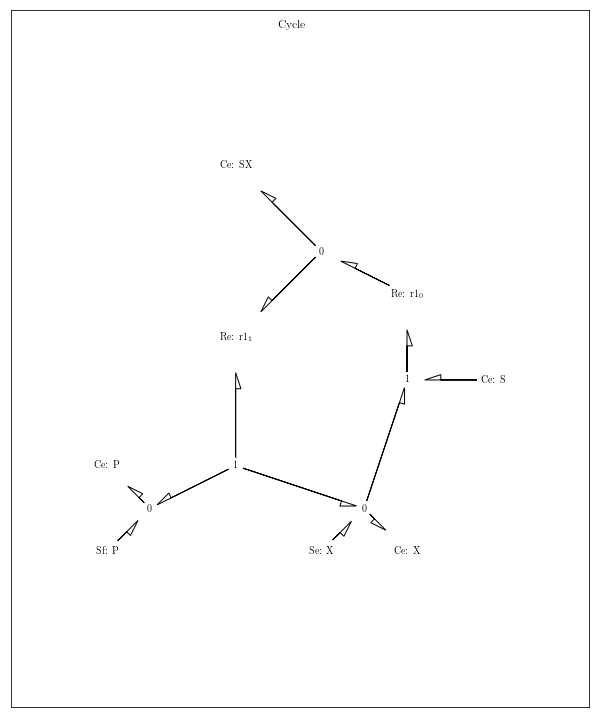

In [3]:
from BondGraphTools.core.layout_manager import arrange, force_directed
from BondGraphTools.transforms.matplotlib import draw
arrange(graph, algorithm=force_directed)
fig = draw(graph)

### Model Equations

As with the RLC example, one can turn a bond graph into equations.
Here we generate the model equations and compute the reduced dynamics.

This system is entirely non-linear, hence both $A$ and $B$ are zero and as a consequence the `linear` reduced equations is zero.

As algorithmically reducing nonlinear systems is a non-trivial problem, the actual calculation can take time (in this case a few seconds), and the functionality is a work in progress.

In [4]:
from BondGraphTools.transforms.latex import bondgraph_to_sympy, reduce
dx, x, A, B, J, NL = bondgraph_to_sympy(graph)
linear, nonlinear = reduce(dx, x, A, B, J, NL)

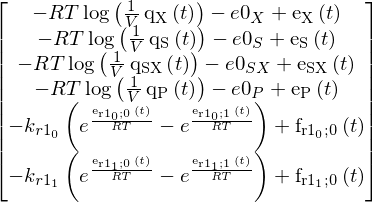

In [5]:
nonlinear